<a href="https://colab.research.google.com/github/anggaagustiratelkom/data_scientist/blob/master/Tugas_Mandiri_Pertemuan_10_Angga_Agustira_UNUD_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-On
---

Hands-On ini digunakan pada kegiatan Microcredential Associate Data Scientist 2021

# Tugas Mandiri Pertemuan 10
---
Pertemuan 10 (sepuluh) pada Microcredential Associate Data Scientist 2021 menyampaikan materi mengenai Membangun Model (Dasar Regresi dan Regresi Linier). silakan Anda kerjakan Latihan 1 s/d 20. Output yang anda lihat merupakan panduan yang dapat Anda ikuti dalam penulisan code :)

# Latihan (1)

### Melakukan import library yang dibutuhkan

In [2]:
# import library pandas
import pandas as pd 

# Import library numpy
import numpy as np

# Import library matplotlib dan seaborn untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Import Module LinearRegression digunakan untuk memanggil algoritma Linear Regression.
from sklearn.linear_model import LinearRegression

# import Module train_test_split digunakan untuk membagi data kita menjadi training dan testing set.
from sklearn.model_selection import train_test_split

# import modul mean_absolute_error dari library sklearn
from sklearn.metrics import mean_absolute_error

#import math agar program dapat menggunakan semua fungsi yang ada pada modul math.(ex:sqrt)
import math 

# me-non aktifkan peringatan pada python
import warnings 
warnings.simplefilter('ignore')

### Load Dataset

In [3]:
#Panggil file (load file bernama CarPrice_Assignment.csv) dan simpan dalam dataframe Lalu tampilkan 10 baris awal dataset dengan function head()
data = 'https://raw.githubusercontent.com/anggaagustiratelkom/data_scientist/master/TugasPertemuan10/CarPrice_Assignment.csv'
dataset = pd.read_csv(data)
dataset.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


# Latihan (2)

### Review Dataset

In [4]:
# melihat jumlah baris dan jumlah kolom (bentuk data) pada data df dengan fungsi .shape 
dataset.shape

(205, 26)

Data kita mempunyai 26 kolom dengan 205 baris.

In [5]:
# Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
# melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
# cek nilai yang hilang / missing values di dalam data
dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Ternyata data kita tidak ada missing values.

Simple linear regression atau regresi linear sederhana merupakan jenis regresi yang paling sederhana karena hanya melibatkan satu variabel bebas atau variabel independen X.

# Visualisasi data untuk pemilihan fitur / variabel independen X
---
1. Variabel y atau variabel dependent adalah 'price'
2. Lakukan Visualisasi dalam penerapannya agar dapat terlihat jelas / mempermudah dalam membaca data tsb
3. Untuk dapat menentukan variabel X yaitu dapat melihat korelasi antar variabel dengan variabel y / kolom 'price'

# Latihan (3)

### untuk dapat menentukan lebih detail / akurat dalam pemilihan fitur dapat dilihat dari hubungan korelasi nya dengan function corr() 

In [12]:
dataset.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


tampaknya enginesize, boreratio, horsepower, wheelbase memiliki korelasi yang signifikan dengan harga/price.

# Latihan (4)

### Buat Visualisasi scater plot dari kolom:

'enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm', 'wheelbase', 'citympg', 'highwaympg'

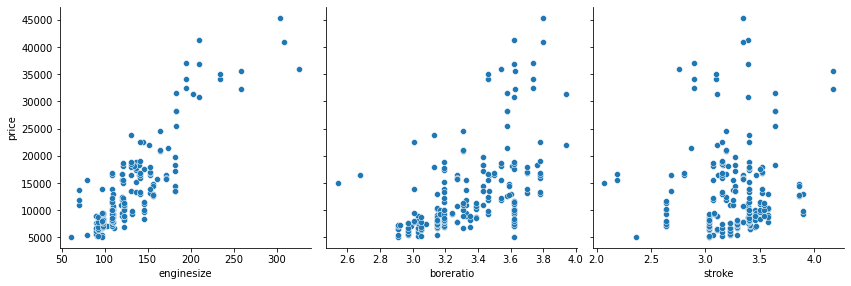

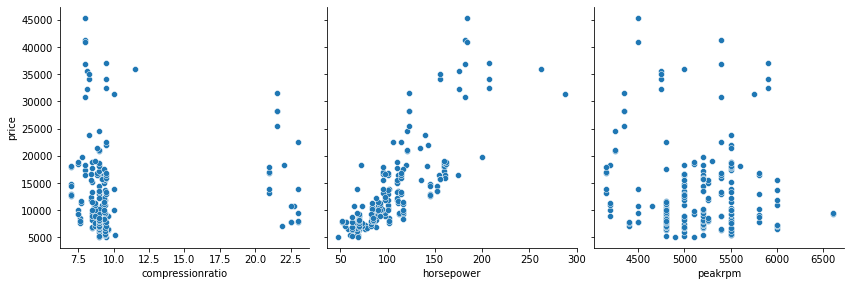

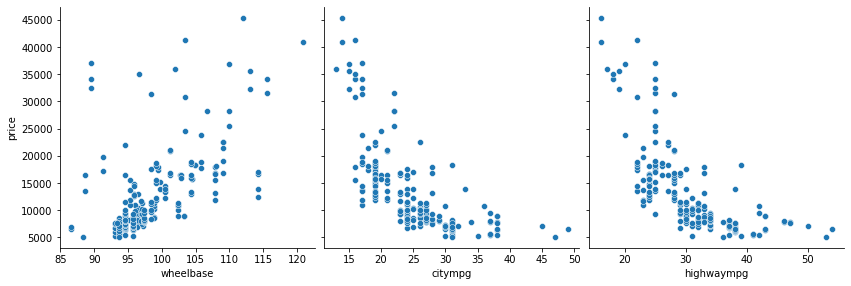

In [22]:
def pp(x,y,z):
    sns.pairplot(dataset, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter' )
    plt.show()

pp("enginesize", "boreratio", "stroke")
pp("compressionratio", "horsepower", "peakrpm")
pp("wheelbase", "citympg", "highwaympg")

# Latihan (5)

### Buat Visualisasi Heatmap dari kolom:

'enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm', 'wheelbase', 'citympg', 'highwaympg'

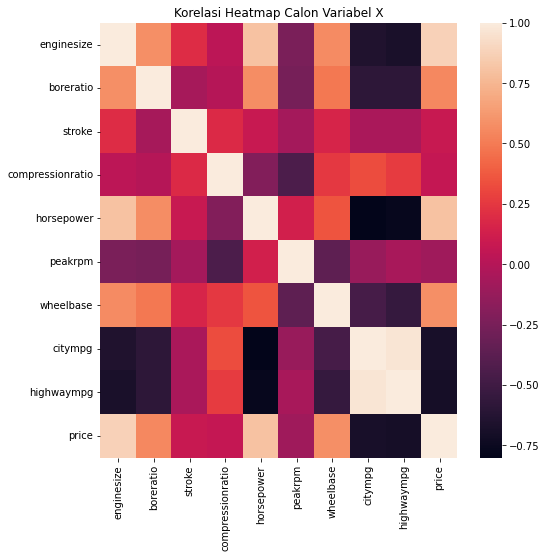

In [45]:
plt.figure(figsize = (8,8))
data_fitur = dataset[['enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm', 'wheelbase', 'citympg', 'highwaympg','price']]
sns.heatmap(data_fitur.corr(),annot=False,fmt="f").set_title("Korelasi Heatmap Calon Variabel X")
plt.show()

Dari hasil visualisasi diatas bahwa fitur/kolom enginesize memiliki korelasi yang tinggi terhadap kolom price / variabel dependent sehingga kita mengambil fitur/kolom enginesize untuk di training
* Independent variabel(x) adalah enginesize.
* Dependent variabel(y) adalah price.

# Latihan (6)

### Buat Visualisasi Scatter Plot antara calon variabel X(enginesize) dan y(price):

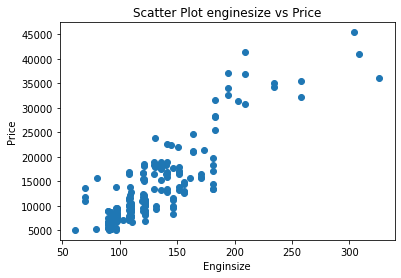

In [46]:
plt.scatter(dataset['enginesize'], dataset['price'])
plt.xlabel('Enginsize')
plt.ylabel('Price')
plt.title('Scatter Plot enginesize vs Price')
plt.show()

Scatter plot menunjukkan dengan jelas hubungan antarvariabel serta sebarannya di dataset. Selain itu, dengan scatter plot juga kita dapat mengindikasikan bahwa variabel enginesize dan price memiliki hubungan linear.

    Catatan : korelasi 0.874145 adalah nilai yang cukup tinggi, artinya nilai price benar-benar sangat dipengaruhi oleh nilai enginesize, karena korelasi tinggi maka algoritma Regresi Linier ini cocok digunakan untuk data tersebut.

# Latihan (7)

### definisi variabel X(enginesize) dan y(price):

In [47]:
# Prepare data
# Pertama, buat variabel x dan y.
x = dataset['enginesize'].values.reshape(-1,1)
y = dataset['price'].values.reshape(-1,1)

Formula Regresi Linear
"Jika kita melihat formula regresi linear di atas, kita pasti ingat rumus persamaan garis yang pernah dipelajari di bangku sekolah, yaitu y = mx + c, dimana m merupakan gradien atau kemiringan garis dan c merupakan konstanta."

* from scratch
* y = ax + b atau y = w1x + w0 atau y = mx + c
* x = input
* y = output
* b atau w0 = intercept / bias
* a atau w1 = slope / gradient / coefficient

# Latihan (8)

### definisi variabel nilai mean/rata-rata X(enginesize) dan nilai mean/rata-rata y(price):

In [49]:
x_mean = np.mean(x)
y_mean = np.mean(y)
print('nilai mean var x: ', x_mean,'\n'
      'nilai mean var y: ', y_mean)

nilai mean var x:  126.90731707317073 
nilai mean var y:  13276.710570731706


# Latihan (9)

### carilah nilai koefisien korelasi nya dengan rumus dibawah:

In [53]:
atas = sum((x - x_mean)*(y - y_mean))
bawah = math.sqrt((sum((x - x_mean)**2)) * (sum((y - y_mean)**2)))
correlation = atas/bawah
print('Nilai Correlation Coefficient: ', correlation)

Nilai Correlation Coefficient:  [0.8741448]



### carilah nilai parameter theta 1 dan theta 0 dengan rumus dibawah:

    theta_1 = ((111-104.11) * (13495-13276.71)) + ... + ((114-104.11) * (22625-13276.71)) / ((111-104.11)^2 + ... + (114-104.11)^2)

# Latihan (10)

### carilah nilai theta_1 atau nilai slope

In [54]:
# slope
# Slope adalah tingkat kemiringan garis, intercept 
# adalah jarak titik y pada garis dari titik 0
variance = sum((x - x_mean)**2)
covariance = sum((x - x_mean) * (y - y_mean))
theta_1 = covariance/variance
print('Nilai theta_1: ',theta_1)

Nilai theta_1:  [167.69841639]


# Latihan (11)

### carilah nilai theta_0 atau nilai intercept 

In [55]:
# intercept
theta_0 = y_mean - (theta_1 * x_mean)
print('Nilai theta_1: ',theta_0)

Nilai theta_1:  [-8005.44553115]


### Maka persamaan garis : 

#     **y = 167.69x - 8005.44**

Jadi persamaan garis diatas dapat digunakan untuk melakukan prediksi apabila kita memiliki data enginesize yang baru, price dapat diperkirakan dengan rumus tersebut, masukkan nilai enginesize baru ke x, maka perkiraan nilai y (price) akan didapat.

# Latihan (12)

### carilah nilai prediksi secara manual dan buatlah visualisasi scater plot nya

In [56]:
# prediction manual
y_pred = theta_0 + (theta_1 * 130)

print(y_pred)

[13795.34859997]


Text(0.5, 1.0, 'Plot enginesize vs Price')

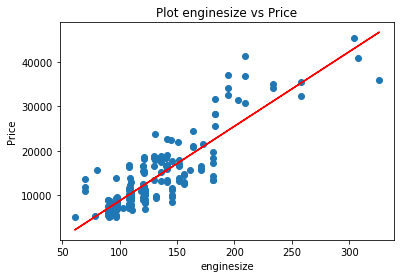

In [58]:
# visualisasi prediksi dengan scatter plot
y_pred = theta_0 + (theta_1 * x)

plt.scatter(dataset['enginesize'],dataset['price'])
plt.plot(x, y_pred, c='r')
plt.xlabel('enginesize')
plt.ylabel('Price')
plt.title('Plot enginesize vs Price')

Linier Regression digunakan untuk Prediksi dengan mencari pola garis terbaik antara variable independent dan dependen

Pros:

    Mudah diimplementasikan
    Digunakan untuk memprediksi nilai numerik/ continous /data jenis interval dan ratio

Cons :

    Cenderung mudah Overfitting
    Tidak dapat digunakan bila relasi antara variabel independen dan dependen tidak linier atau korelasi variabel rendah

# Linier Regression dengan menggunakan library sklearn

1. Pertama yang kita lakukan adalah split data, Train/test split adalah salah satu metode yang dapat digunakan untuk mengevaluasi performa model machine learning. Metode evaluasi model ini membagi dataset menjadi dua bagian yakni bagian yang digunakan untuk training data dan untuk testing data dengan proporsi tertentu. Train data digunakan untuk fit model machine learning, sedangkan test data digunakan untuk mengevaluasi hasil fit model tersebut.



Python memiliki library yang dapat mengimplementasikan train/test split dengan mudah yaitu Scikit-Learn. Untuk menggunakannya, kita perlu mengimport Scikit-Learn terlebih dahulu, kemudian setelah itu kita dapat menggunakan fungsi train_test_split().

# Latihan (13)

### split data train dan test dengan function  train_test_split() dengan train_size=0.8, test_size=0.2 dan random_state=100

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 100)

* X_train: Untuk menampung data source yang akan dilatih.
* X_test: Untuk menampung data target yang akan dilatih.
* y_train: Untuk menampung data source yang akan digunakan untuk testing.
* y_test: Untuk menampung data target yang akan digunakan untuk testing.

X dan y adalah nama variabel yang digunakan saat mendefinisikan data source dan data target. Parameter *test_size* digunakan untuk mendefinisikan ukuran data testing. Dalam contoh di atas, test_size=0.2 berarti data yang digunakan sebagai data testing adalah sebesar 20% dari keseluruhan dataset.

Perlu diketahui bahwa metode ini akan membagi train set dan test set secara random atau acak. Jadi, jika kita mengulang proses running, maka tentunya hasil yang didapat akan berubah-ubah. Untuk mengatasinya, kita dapat menggunakan parameter *random_state*

# Latihan (14)

### buat object variabel linier regression

In [68]:
regressor = LinearRegression()

# Latihan (15)

### training the model menggunakan training data yang sudah displit sebelumnya.

In [69]:
regressor.fit(x_train, y_train)

LinearRegression()

# Latihan (16)

### cari tau nilai slope/koefisien (m) dan intercept (b), dengan menggunakan function dari library sklearn -> LinierRegression

In [70]:
print(regressor.coef_)
print(regressor.intercept_)

[[168.17363122]]
[-8037.06049611]


Dari nilai m dan b diatas, kalau dimasukan ke dalam rumus persamaan menjadi:
#     **y = 168.17x - 8037.06**

# Latihan (17)

### cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit sebelumnya. Dan nilai korelasinya

In [71]:
regressor.score(x_test, y_test)

0.8068161903454086

Model kita mendapatkan accuracy score sebesar 80.68%

In [72]:
print('Correlation: ', math.sqrt(regressor.score(x_test,y_test)))

Correlation:  0.8982294753265496


# Latihan (18)

### visualisasi Regression Line menggunakan data testing.

Text(0.5, 1.0, 'Plot enginesize vs Price')

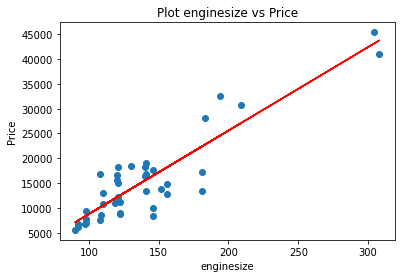

In [73]:
y_prediksi = regressor.predict(x_test)

plt.scatter(x_test,y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('enginesize')
plt.ylabel('Price')
plt.title('Plot enginesize vs Price')

Garis merah merupakan Regression Line dari model yang telah dibuat sebelumnya.

# Latihan (19)

### Setelah kita yakin dengan model yang dibuat, selanjutnya adalah prediksi dari harga mobil dengan enginesize 100, 150, dan 200.

In [81]:
#Prediksi harga mobil dengan enginesize 130.

print('nilai prediksi harga dengan enginesize 100 : ',regressor.predict([[100]]))
print('nilai prediksi harga dengan enginesize 150 : ',regressor.predict([[150]]))
print('nilai prediksi harga dengan enginesize 200 : ',regressor.predict([[200]]))

nilai prediksi harga dengan enginesize 100 :  [[8780.30262568]]
nilai prediksi harga dengan enginesize 150 :  [[17188.98418658]]
nilai prediksi harga dengan enginesize 200 :  [[25597.66574748]]


In [82]:
np_table = np.concatenate((x_test,y_test,y_prediksi), axis=1)
new_dataframe = pd.DataFrame(data=np_table, columns=['x_test','y_test','y_predict'])

In [83]:
new_dataframe

,x_test,y_test,y_predict
0,98.0,7738.0,8443.955363
1,109.0,8495.0,10293.865307
2,122.0,8845.0,12480.122512
3,98.0,9298.0,8443.955363
4,108.0,7603.0,10125.691675
5,122.0,11245.0,12480.122512
6,130.0,18420.0,13825.511562
7,140.0,16503.0,15507.247874
8,146.0,17669.0,16516.289662
9,181.0,17199.0,22402.366754


Semakin tinggi nilai error, semakin besar errornya

# Latihan (20)

### Cetak nilai Mean Absolute Error, Mean Squared Error, dan Root Mean Squared Error

In [86]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_prediksi))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_prediksi))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_prediksi)))    

Mean Absolute Error: 3123.611515387693
Mean Squared Error: 14882644.972928163
Root Mean Squared Error: 3857.8031278083854


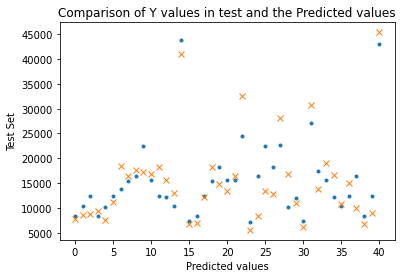

In [94]:
plt.title('Comparison of Y values in test and the Predicted values')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
plt.plot(y_prediksi, '.', y_test, 'x')
plt.show()